# Classifying newswires: A multiclass classification on Reuters Dataset

### Reuters Dataset

- A set of short newswires and thier topics, published by Reuters in 1986. It's a widely used dataset for text classification.
- There are 46 different topics; some topics are more represented than others, but each topic has atleast 10 examples in the training set.
- This is a multiclass classification problem with 46 classes

In [102]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

In [52]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [53]:
print('train data size ->',f'{len(train_data)}')
print('test data size->',f'{len(test_data)}')

train data size -> 8982
test data size-> 2246


### Preparing the data

- Vectorize the data


In [54]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### One-hot encode the labels

In [26]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Split the data into train, vlidation and test sets

In [85]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, one_hot_train_labels, test_size = 0.2, random_state = 12345)

In [147]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
del model

(7185, 10000)
(7185, 46)
(1797, 10000)
(1797, 46)


## Build the network

In [148]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [149]:
adam = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=9, batch_size=128, validation_data=(X_val, Y_val))

Train on 7185 samples, validate on 1797 samples
Epoch 1/9
7185/7185 [==============================] - 4s 610us/step - loss: 2.2689 - acc: 0.5388 - val_loss: 1.3580 - val_acc: 0.6917
Epoch 2/9
7185/7185 [==============================] - 1s 203us/step - loss: 1.0834 - acc: 0.7606 - val_loss: 1.0570 - val_acc: 0.7641
Epoch 3/9
7185/7185 [==============================] - 2s 214us/step - loss: 0.6767 - acc: 0.8554 - val_loss: 0.9299 - val_acc: 0.7997
Epoch 4/9
7185/7185 [==============================] - 1s 207us/step - loss: 0.4327 - acc: 0.9106 - val_loss: 0.8924 - val_acc: 0.8024
Epoch 5/9
7185/7185 [==============================] - 2s 214us/step - loss: 0.2901 - acc: 0.9368 - val_loss: 0.8706 - val_acc: 0.8125
Epoch 6/9
7185/7185 [==============================] - 1s 198us/step - loss: 0.2290 - acc: 0.9499 - val_loss: 0.8811 - val_acc: 0.8091
Epoch 7/9
7185/7185 [==============================] - 1s 193us/step - loss: 0.1854 - acc: 0.9557 - val_loss: 0.9255 - val_acc: 0.8102
Epoch 8

In [150]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 1.0871831496061222
Test accuracy: 0.7791629563668745


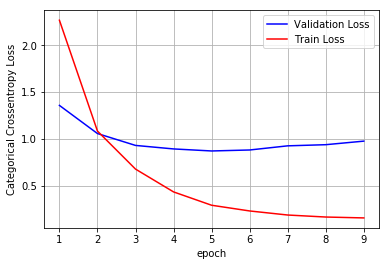

In [151]:
score = model.evaluate(X_test, Y_test, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,9+1))
# x = list(range(1,es.stopped_epoch+2))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# USing Machine Learning Models

In [157]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from sklearn.externals.joblib import load
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()
scaler.fit(X_train)
clf = OneVsRestClassifier(LinearSVC(penalty='l2', 
                                    loss = 'hinge',
                                    max_iter = 2000,
                                    random_state=0)).fit(X_train, Y_train)
filename = 'D:/Projects/keras/Reuters_MulticlassClassification/svm_v1_lin_mod.sav'
joblib.dump(clf, filename)

C:\Users\Shubham\.conda\envs\shub\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Shubham\.conda\envs\shub\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


['D:/Projects/keras/Reuters_MulticlassClassification/svm_v1_lin_mod.sav']

### Performance metrics

In [171]:
svmmodel = load(filename)
scaler.fit(X_test)
result = svmmodel.score(X_test, Y_test)
print(result)

# For calculating Confusion matrix and accuracy
pred_array = svmmodel.predict(X_test)
print(accuracy_score(Y_test, pred_array))
# print(pred_array)

0.7003561887800535
0.7003561887800535


In [170]:
print(confusion_matrix(Y_test.argmax(axis=1), pred_array.argmax(axis=1)))
# import pandas as pd
# y_test = pd.Series(Y_test)

[[ 8  1  0 ...  0  0  0]
 [26 67  0 ...  0  0  0]
 [ 6  0 13 ...  0  0  0]
 ...
 [ 4  0  0 ...  2  0  0]
 [ 1  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
